In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import matplotlib.pyplot as plt

cwd = os.getcwd()
PATH = os.path.join(cwd, 'nonResized')

In [2]:
train_dir = os.path.join(PATH, 'train')
#train_dir = os.path.join('C:\\Users\\tonylizj\\Documents\\GitHub\\flower-id\\flowers', 'train')
validation_dir = os.path.join(PATH, 'validation')
#validation_dir = os.path.join('C:\\Users\\tonylizj\\Documents\\GitHub\\flower-id\\flowers', 'validation')
print(train_dir)

C:\Users\tonylizj\Documents\GitHub\flower-id\nonResized\train


In [3]:
batch_size = 128
epochs = 20
IMG_HEIGHT = 200
IMG_WIDTH = 200

In [4]:
total_train, total_val = 0, 0

for category in os.listdir(train_dir):
    total_train += len(os.listdir(os.path.join(train_dir, category)))
for category in os.listdir(validation_dir):
    total_val += len(os.listdir(os.path.join(validation_dir, category)))

print("Training images: " + str(total_train))
print("Validation images: " + str(total_val))


Training images: 2850
Validation images: 1473


In [5]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=45,
                                           width_shift_range=.15,
                                           height_shift_range=.15,
                                           horizontal_flip=True,
                                           zoom_range=0.5)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

sample_training_images, _ = next(train_data_gen)

Found 2850 images belonging to 5 classes.
Found 1473 images belonging to 5 classes.


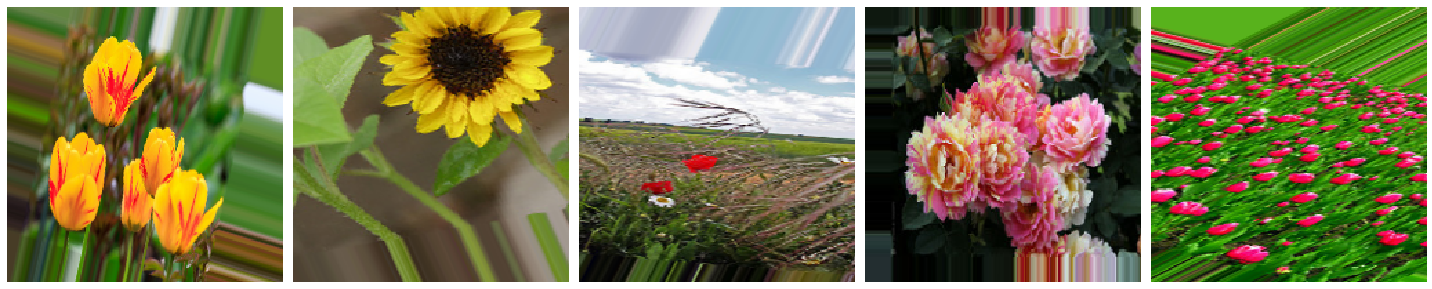

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(sample_training_images[:20])

In [7]:
'''
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])
'''
model = tf.keras.models.load_model('model.h5')

In [8]:
'''
opt = tf.keras.optimizers.SGD(lr=0.01)

model.compile(optimizer = opt,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
'''

"\nopt = tf.keras.optimizers.SGD(lr=0.01)\n\nmodel.compile(optimizer = opt,\n              loss = 'categorical_crossentropy',\n              metrics = ['accuracy'])\n"

In [9]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/100
22/22 [==============================] - 40s 2s/step - loss: 0.8291 - accuracy: 0.6859 - val_loss: 1.0297 - val_accuracy: 0.6009

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

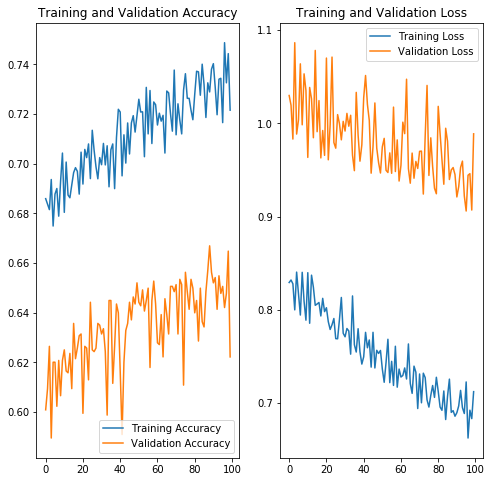

In [11]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
model.summary()
model.save('model.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0